In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools
import csv
import sys

%matplotlib inline

In [2]:
loc = ""
raw_data_1 = pd.read_csv(loc + 'season 2000-2001.csv')
raw_data_2 = pd.read_csv(loc + 'season 2001-2002.csv')
raw_data_3 = pd.read_csv(loc + 'season 2002-2003.csv')
raw_data_4 = pd.read_csv(loc + 'season 2003-2004.csv')
raw_data_5 = pd.read_csv(loc + 'season 2004-2005.csv')
raw_data_6 = pd.read_csv(loc + 'season 2005-2006.csv')
raw_data_7 = pd.read_csv(loc + 'season 2006-2007.csv')
raw_data_8 = pd.read_csv(loc + 'season 2007-2008.csv')
raw_data_9 = pd.read_csv(loc + 'season 2008-2009.csv')
raw_data_10 = pd.read_csv(loc + 'season 2009-2010.csv')
raw_data_11 = pd.read_csv(loc + 'season 2010-2011.csv')
raw_data_12 = pd.read_csv(loc + 'season 2011-2012.csv')
raw_data_13 = pd.read_csv(loc + 'season 2012-2013.csv')
raw_data_14 = pd.read_csv(loc + 'season 2013-2014.csv')
raw_data_15 = pd.read_csv(loc + 'season 2014-2015.csv')
raw_data_16 = pd.read_csv(loc + 'season 2015-2016.csv')
raw_data_17 = pd.read_csv(loc + 'season 2016-2017.csv')
raw_data_15.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
375,E0,24-05-2015,Hull,Man United,0,0,D,0,0,D,...,1.99,25,0.50,1.76,1.71,2.27,2.19,3.20,3.76,2.27
376,E0,24-05-2015,Leicester,QPR,5,1,H,2,0,H,...,2.41,28,-1.00,1.98,1.93,1.98,1.93,1.53,4.94,6.13
377,E0,24-05-2015,Man City,Southampton,2,0,H,1,0,H,...,2.66,28,-1.00,2.00,1.94,2.03,1.93,1.60,4.35,6.00
378,E0,24-05-2015,Newcastle,West Ham,2,0,H,0,0,D,...,2.25,25,-0.50,1.82,1.78,2.20,2.10,1.76,4.01,4.98
379,E0,24-05-2015,Stoke,Liverpool,6,1,H,5,0,H,...,1.99,25,0.25,2.07,2.02,1.88,1.85,3.56,3.60,2.17


In [3]:
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR' ,'AR']
playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_15
def get_goals_scored(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat


# Apply to each dataset
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_16


C:\Users\mail2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mail2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mail2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,HF,AF,HY,AY,HR,AR,HTGS,ATGS,HTGC,ATGC
0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,11,7,2,...,13,13,3,4,0,0,0,0,0,0
1,08/08/15,Chelsea,Swansea,2,2,D,1,11,18,3,...,15,16,1,3,1,0,0,0,0,0
2,08/08/15,Everton,Watford,2,2,D,1,10,11,5,...,7,13,1,2,0,0,0,0,0,0
3,08/08/15,Leicester,Sunderland,4,2,H,0,19,10,8,...,13,17,2,4,0,0,0,0,0,0
4,08/08/15,Man United,Tottenham,1,0,H,0,9,9,1,...,12,12,2,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,15/05/16,Stoke,West Ham,2,1,H,1,7,20,4,...,8,12,3,1,0,0,39,64,54,49
376,15/05/16,Swansea,Man City,1,1,D,1,4,18,1,...,4,19,1,3,0,0,41,70,51,40
377,15/05/16,Watford,Sunderland,2,2,D,1,21,6,6,...,11,10,1,0,0,0,38,46,48,60
378,15/05/16,West Brom,Liverpool,1,1,D,1,13,7,1,...,11,14,3,1,0,0,33,62,47,49


In [4]:
playing_statistics_16.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,HF,AF,HY,AY,HR,AR,HTGS,ATGS,HTGC,ATGC
0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,11,7,2,...,13,13,3,4,0,0,0,0,0,0
1,08/08/15,Chelsea,Swansea,2,2,D,1,11,18,3,...,15,16,1,3,1,0,0,0,0,0
2,08/08/15,Everton,Watford,2,2,D,1,10,11,5,...,7,13,1,2,0,0,0,0,0,0
3,08/08/15,Leicester,Sunderland,4,2,H,0,19,10,8,...,13,17,2,4,0,0,0,0,0,0
4,08/08/15,Man United,Tottenham,1,0,H,0,9,9,1,...,12,12,2,3,0,0,0,0,0,0


In [5]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
playing_statistics_1 = get_agg_points(playing_statistics_1)
playing_statistics_2 = get_agg_points(playing_statistics_2)
playing_statistics_3 = get_agg_points(playing_statistics_3)
playing_statistics_4 = get_agg_points(playing_statistics_4)
playing_statistics_5 = get_agg_points(playing_statistics_5)
playing_statistics_6 = get_agg_points(playing_statistics_6)
playing_statistics_7 = get_agg_points(playing_statistics_7)
playing_statistics_8 = get_agg_points(playing_statistics_8)
playing_statistics_9 = get_agg_points(playing_statistics_9)
playing_statistics_10 = get_agg_points(playing_statistics_10)
playing_statistics_11 = get_agg_points(playing_statistics_11)
playing_statistics_12 = get_agg_points(playing_statistics_12)
playing_statistics_13 = get_agg_points(playing_statistics_13)
playing_statistics_14 = get_agg_points(playing_statistics_14)
playing_statistics_15 = get_agg_points(playing_statistics_15)
playing_statistics_16 = get_agg_points(playing_statistics_16)


C:\Users\mail2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mail2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    
    
# Make changes to df
playing_statistics_1 = add_form_df(playing_statistics_1)
playing_statistics_2 = add_form_df(playing_statistics_2)
playing_statistics_3 = add_form_df(playing_statistics_3)
playing_statistics_4 = add_form_df(playing_statistics_4)
playing_statistics_5 = add_form_df(playing_statistics_5)
playing_statistics_6 = add_form_df(playing_statistics_6)
playing_statistics_7 = add_form_df(playing_statistics_7)
playing_statistics_8 = add_form_df(playing_statistics_8)
playing_statistics_9 = add_form_df(playing_statistics_9)
playing_statistics_10 = add_form_df(playing_statistics_10)
playing_statistics_11 = add_form_df(playing_statistics_11)
playing_statistics_12 = add_form_df(playing_statistics_12)
playing_statistics_13 = add_form_df(playing_statistics_13)
playing_statistics_14 = add_form_df(playing_statistics_14)
playing_statistics_15 = add_form_df(playing_statistics_15)    
playing_statistics_16 = add_form_df(playing_statistics_16)


C:\Users\mail2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mail2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
playing_statistics_16.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,HM1,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5
0,08/08/15,Bournemouth,Aston Villa,0,1,A,0,11,7,2,...,M,M,M,M,M,M,M,M,M,M
1,08/08/15,Chelsea,Swansea,2,2,D,1,11,18,3,...,M,M,M,M,M,M,M,M,M,M
2,08/08/15,Everton,Watford,2,2,D,1,10,11,5,...,M,M,M,M,M,M,M,M,M,M
3,08/08/15,Leicester,Sunderland,4,2,H,0,19,10,8,...,M,M,M,M,M,M,M,M,M,M
4,08/08/15,Man United,Tottenham,1,0,H,0,9,9,1,...,M,M,M,M,M,M,M,M,M,M


In [8]:
playing_stat = pd.concat([raw_data_3,raw_data_4,raw_data_5,raw_data_6,raw_data_7,raw_data_8,raw_data_9,raw_data_10,raw_data_11,raw_data_12,raw_data_13,raw_data_14,raw_data_15,raw_data_16,raw_data_17],ignore_index=True)

C:\Users\mail2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_1.head()

C:\Users\mail2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,MW
0,19/08/00,Charlton,Man City,4,0,H,0,17,8,14,...,M,M,M,M,M,M,M,M,M,1
1,19/08/00,Chelsea,West Ham,4,2,H,0,17,12,10,...,M,M,M,M,M,M,M,M,M,1
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,6,16,3,...,M,M,M,M,M,M,M,M,M,1
3,19/08/00,Derby,Southampton,2,2,D,2,6,13,4,...,M,M,M,M,M,M,M,M,M,1
4,19/08/00,Leeds,Everton,2,0,H,0,17,12,8,...,M,M,M,M,M,M,M,M,M,1


In [10]:
playing_stat = pd.concat([playing_statistics_1,
                          playing_statistics_2,
                          playing_statistics_3,
                          playing_statistics_4,
                          playing_statistics_5,
                          playing_statistics_6,
                          playing_statistics_7,
                          playing_statistics_8,
                          playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
#                          playing_statistics_15,
                          playing_statistics_16], ignore_index=True)
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)



playing_stat.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,AM3,HM4,AM4,HM5,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts
5695,15/05/16,Stoke,West Ham,2,1,H,1,7,20,4,...,W,L,W,L,D,38,LDLLL,WLWWD,1,10
5696,15/05/16,Swansea,Man City,1,1,D,1,4,18,1,...,W,L,D,W,W,38,WWLLW,DLWDW,9,8
5697,15/05/16,Watford,Sunderland,2,2,D,1,21,6,6,...,D,L,D,W,W,38,LLWLW,WWDDW,6,11
5698,15/05/16,West Brom,Liverpool,1,1,D,1,13,7,1,...,L,L,D,L,W,38,DLDLL,DWLDW,2,8
5699,17/05/16,Man United,Bournemouth,3,1,H,0,12,7,5,...,L,W,L,W,W,38,LWDWW,DLLLW,10,4


In [11]:
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']



In [12]:
playing_stat[['HomeTeam','AwayTeam','HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP','FTR', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR' ,'AR' ]].head()

,HomeTeam,AwayTeam,HTGD,ATGD,DiffPts,DiffFormPts,HTP,ATP,FTR,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,Charlton,Man City,0,0,0,0,0,0,H,17,...,14,4,6,6,13,12,1,2,0,0
1,Chelsea,West Ham,0,0,0,0,0,0,H,17,...,10,5,7,7,19,14,1,2,0,0
2,Coventry,Middlesbrough,0,0,0,0,0,0,A,6,...,3,9,8,4,15,21,5,3,1,0
3,Derby,Southampton,0,0,0,0,0,0,D,6,...,4,6,5,8,11,13,1,1,0,0
4,Leeds,Everton,0,0,0,0,0,0,H,17,...,8,6,6,4,21,20,1,3,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE5BC79748>,
      dtype=object)

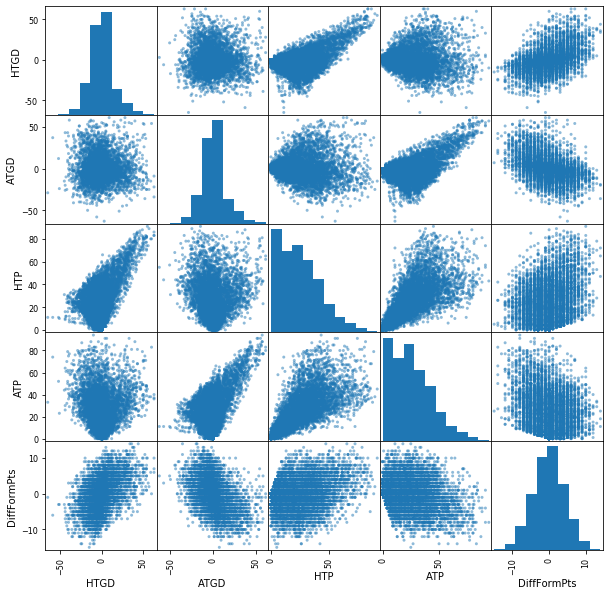

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(playing_stat[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(10,10))

In [14]:
playing_stat.to_csv("Siraj Merged_dataset.csv")

In [135]:
df = pd.read_csv("Siraj Merged_dataset.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
list(df)

['Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'HTGS',
 'ATGS',
 'HTGC',
 'ATGC',
 'HTP',
 'ATP',
 'HM1',
 'AM1',
 'HM2',
 'AM2',
 'HM3',
 'AM3',
 'HM4',
 'AM4',
 'HM5',
 'AM5',
 'MW',
 'HTFormPtsStr',
 'ATFormPtsStr',
 'HTFormPts',
 'ATFormPts',
 'HTGD',
 'ATGD',
 'DiffPts',
 'DiffFormPts']

In [136]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTAG,HS,AS,HST,...,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTGD,ATGD,DiffPts,DiffFormPts
0,19/08/00,Charlton,Man City,4,0,H,0,17,8,14,...,M,1,MMMMM,MMMMM,0,0,0,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,H,0,17,12,10,...,M,1,MMMMM,MMMMM,0,0,0,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,A,1,6,16,3,...,M,1,MMMMM,MMMMM,0,0,0,0,0,0
3,19/08/00,Derby,Southampton,2,2,D,2,6,13,4,...,M,1,MMMMM,MMMMM,0,0,0,0,0,0
4,19/08/00,Leeds,Everton,2,0,H,0,17,12,8,...,M,1,MMMMM,MMMMM,0,0,0,0,0,0


In [16]:
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS','MP'))

avg_home_scored = df.FTHG.sum() / 6080.0
avg_away_scored = df.FTAG.sum() / 6080.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_away_conceded)
table

1.4307565789473684


,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS,MP


In [157]:
total_matches=df['HomeTeam'].value_counts().to_dict()

In [158]:
total_matches

{'Man United': 285,
 'Chelsea': 285,
 'Arsenal': 285,
 'Tottenham': 285,
 'Everton': 285,
 'Liverpool': 285,
 'Aston Villa': 285,
 'Man City': 266,
 'Newcastle': 266,
 'Fulham': 247,
 'Sunderland': 228,
 'West Ham': 228,
 'Bolton': 209,
 'Blackburn': 209,
 'West Brom': 171,
 'Wigan': 152,
 'Middlesbrough': 152,
 'Southampton': 152,
 'Stoke': 133,
 'Birmingham': 133,
 'Portsmouth': 133,
 'Charlton': 133,
 'Norwich': 95,
 'Leicester': 76,
 'Swansea': 76,
 'Leeds': 76,
 'Wolves': 76,
 'Derby': 57,
 'Crystal Palace': 57,
 'Hull': 57,
 'Reading': 57,
 'Ipswich': 38,
 'QPR': 38,
 'Watford': 38,
 'Coventry': 19,
 'Burnley': 19,
 'Sheffield United': 19,
 'Cardiff': 19,
 'Bradford': 19,
 'Blackpool': 19,
 'Bournemouth': 19,
 'Middlesboro': 19}

In [17]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')

In [193]:
table.Team = res_home.HomeTeam.min().values
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values
table.MP = res_home.HomeTeam.count().values
#19 Home matches for each team each season and 16 seasons therefore 304 home matches and 304 away matches
table.HAS = (table.HGS / table.MP)
table.AAS = (table.AGS / table.MP)
table.HDS = (table.HGC / table.MP)
table.ADS = (table.AGC / table.MP)

table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS,MP
0,Arsenal,621,473,2.178947,1.659649,239,320,0.838596,1.122807,285
1,Aston Villa,359,328,1.259649,1.150877,316,469,1.108772,1.645614,285
2,Birmingham,162,111,1.218045,0.834586,140,220,1.052632,1.654135,133
3,Blackburn,289,229,1.382775,1.095694,239,353,1.143541,1.688995,209
4,Blackpool,30,25,1.578947,1.315789,37,41,1.947368,2.157895,19
5,Bolton,278,217,1.330144,1.038278,260,353,1.244019,1.688995,209
6,Bournemouth,23,22,1.210526,1.157895,34,33,1.789474,1.736842,19
7,Bradford,20,10,1.052632,0.526316,29,41,1.526316,2.157895,19
8,Burnley,25,17,1.315789,0.894737,30,52,1.578947,2.736842,19
9,Cardiff,20,12,1.052632,0.631579,35,39,1.842105,2.052632,19


In [200]:
df.HM1 = df.HM1.astype('str')
df.HM2 = df.HM2.astype('str')
df.HM3 = df.HM3.astype('str')
df.AM1 = df.AM1.astype('str')
df.AM2 = df.AM2.astype('str')
df.AM3 = df.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

AttributeError: 'DataFrame' object has no attribute 'HM1'

In [161]:
df.dropna(how='any',axis=0,inplace=True)
list(df)

['Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'HTGS',
 'ATGS',
 'HTGC',
 'ATGC',
 'HTP',
 'ATP',
 'HM1',
 'AM1',
 'HM2',
 'AM2',
 'HM3',
 'AM3',
 'HM4',
 'AM4',
 'HM5',
 'AM5',
 'MW',
 'HTFormPtsStr',
 'ATFormPtsStr',
 'HTFormPts',
 'ATFormPts',
 'HTGD',
 'ATGD',
 'DiffPts',
 'DiffFormPts']

In [162]:
feature_table = df.iloc[:,:100]

#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP',
                               'HC','AC','HF','AF','HY','AY','HR','AR']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
f_MP = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])
    f_MP.append(table[table['Team'] == row['HomeTeam']]['MP'].values[0])
    

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table['MP'] = f_MP
list(feature_table)

['HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HS',
 'AS',
 'HST',
 'AST',
 'HTGD',
 'ATGD',
 'DiffPts',
 'DiffFormPts',
 'HTP',
 'ATP',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR',
 'HAS',
 'HDS',
 'AAS',
 'ADS',
 'MP']

In [163]:
feature_table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HTGD,...,AF,HY,AY,HR,AR,HAS,HDS,AAS,ADS,MP
0,Charlton,Man City,4,0,H,17,8,14,4,0,...,12,1,2,0,0,1.345865,1.338346,1.285714,1.368421,133
1,Chelsea,West Ham,4,2,H,17,12,10,5,0,...,14,1,2,0,0,2.154386,0.800000,0.969298,1.653509,285
2,Coventry,Middlesbrough,1,3,A,6,16,3,9,0,...,21,5,3,1,0,0.736842,1.210526,0.927632,1.434211,19
3,Derby,Southampton,2,2,D,6,13,4,6,0,...,13,1,1,0,0,0.964912,1.631579,1.013158,1.513158,57
4,Leeds,Everton,2,0,H,17,12,8,6,0,...,20,1,3,0,0,1.539474,1.302632,1.073684,1.354386,76


In [164]:
feature_table.to_csv(loc + "Feature_table.csv")

In [165]:
#Function to transform FTR into numeric data type
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [166]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HTGD,...,HY,AY,HR,AR,HAS,HDS,AAS,ADS,MP,Result
0,Charlton,Man City,4,0,H,17,8,14,4,0,...,1,2,0,0,1.345865,1.338346,1.285714,1.368421,133,1
1,Chelsea,West Ham,4,2,H,17,12,10,5,0,...,1,2,0,0,2.154386,0.800000,0.969298,1.653509,285,1
2,Coventry,Middlesbrough,1,3,A,6,16,3,9,0,...,5,3,1,0,0.736842,1.210526,0.927632,1.434211,19,-1
3,Derby,Southampton,2,2,D,6,13,4,6,0,...,1,1,0,0,0.964912,1.631579,1.013158,1.513158,57,0
4,Leeds,Everton,2,0,H,17,12,8,6,0,...,1,3,0,0,1.539474,1.302632,1.073684,1.354386,76,1


In [167]:
df=feature_table.drop(["FTR"],axis=1)

In [168]:
df.describe()
df.to_csv(loc + "df.csv")

In [169]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [170]:
array = df.values
names = list(df.columns.values)
X = array[:,2:25]
Y = array[:,25]
Y = Y.astype('int')
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)
#print (rfe.score)
#print (sorted(zip(map(lambda x: round(x, 4), rfe.score),names), reverse=True))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

10
[ True False  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True  True]
[ 1  4  1  1  1  2  6  3  5 11  7 13  9 12  8 14 10  1  1  1  1  1  1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [171]:
feature_table.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HTGD,...,HY,AY,HR,AR,HAS,HDS,AAS,ADS,MP,Result
0,Charlton,Man City,4,0,H,17,8,14,4,0,...,1,2,0,0,1.345865,1.338346,1.285714,1.368421,133,1
1,Chelsea,West Ham,4,2,H,17,12,10,5,0,...,1,2,0,0,2.154386,0.800000,0.969298,1.653509,285,1
2,Coventry,Middlesbrough,1,3,A,6,16,3,9,0,...,5,3,1,0,0.736842,1.210526,0.927632,1.434211,19,-1
3,Derby,Southampton,2,2,D,6,13,4,6,0,...,1,1,0,0,0.964912,1.631579,1.013158,1.513158,57,0
4,Leeds,Everton,2,0,H,17,12,8,6,0,...,1,3,0,0,1.539474,1.302632,1.073684,1.354386,76,1


In [172]:
teams=feature_table.HomeTeam.unique()

In [173]:
dictOfteams = { i : teams[i] for i in range(0, len(teams) ) }

In [174]:
dictOfteams

{0: 'Charlton',
 1: 'Chelsea',
 2: 'Coventry',
 3: 'Derby',
 4: 'Leeds',
 5: 'Leicester',
 6: 'Liverpool',
 7: 'Sunderland',
 8: 'Tottenham',
 9: 'Man United',
 10: 'Arsenal',
 11: 'Bradford',
 12: 'Ipswich',
 13: 'Middlesbrough',
 14: 'Everton',
 15: 'Man City',
 16: 'Newcastle',
 17: 'Southampton',
 18: 'West Ham',
 19: 'Aston Villa',
 20: 'Bolton',
 21: 'Blackburn',
 22: 'Fulham',
 23: 'Birmingham',
 24: 'Middlesboro',
 25: 'West Brom',
 26: 'Portsmouth',
 27: 'Wolves',
 28: 'Norwich',
 29: 'Crystal Palace',
 30: 'Wigan',
 31: 'Reading',
 32: 'Sheffield United',
 33: 'Watford',
 34: 'Hull',
 35: 'Stoke',
 36: 'Burnley',
 37: 'Blackpool',
 38: 'QPR',
 39: 'Swansea',
 40: 'Cardiff',
 41: 'Bournemouth'}

In [175]:
inv_map = {dictOfteams[k] : k for k in dictOfteams}

In [176]:
df=pd.DataFrame()

In [177]:
df['home_team']=feature_table['HomeTeam']
df['away_team']=feature_table['AwayTeam']

In [178]:
df['home_team_code']=df['home_team'].map(inv_map)
df['away_team_code']=df['away_team'].map(inv_map)

In [179]:
df.head()

,home_team,away_team,home_team_code,away_team_code
0,Charlton,Man City,0,15
1,Chelsea,West Ham,1,18
2,Coventry,Middlesbrough,2,13
3,Derby,Southampton,3,17
4,Leeds,Everton,4,14


In [180]:
feature_table['home_team_code']=df['home_team_code']
feature_table['away_team_code']=df['away_team_code']

In [187]:
#Two sets of training sets - adding features.
X_train = feature_table[['HAS','HDS','AAS','ADS','DiffPts','DiffFormPts','MP','home_team_code','away_team_code']]
y_train = feature_table['Result']
display(X_train.head())

,DiffPts,DiffFormPts,MP,home_team_code,away_team_code
0,0,0,133,0,15
1,0,0,285,1,18
2,0,0,19,2,13
3,0,0,57,3,17
4,0,0,76,4,14


In [188]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [189]:
X_train.shape

(5700, 5)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size=0.20,
                                                    random_state = 2,
                                                    stratify = y_train)

In [191]:
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
   # print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
  #  print "Made predictions in {:.4f} seconds.".format(end - start)
    
    return f1_score(target, y_pred, pos_label='H',average='micro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    #print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))


In [192]:
import xgboost as xgb
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='linear')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, aver

0.5072368421052632 0.5072368421052632
F1 score and accuracy score for training set: 0.5072 , 0.5072.
F1 score and accuracy score for test set: 0.5219 , 0.5219.



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.5057017543859649 0.5057017543859649
F1 score and accuracy score for training set: 0.5057 , 0.5057.
F1 score and accuracy score for test set: 0.5184 , 0.5184.

0.5471491228070176 0.5471491228070176
F1 score and accuracy score for training set: 0.5471 , 0.5471.
F1 score and accuracy score for test set: 0.5316 , 0.5316.



In [198]:

clf_C = xgb.XGBClassifier()

train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')

0.5471491228070176 0.5471491228070176
F1 score and accuracy score for training set: 0.5471 , 0.5471.
F1 score and accuracy score for test set: 0.5316 , 0.5316.



In [ ]:
#The results are not very promising. I am still working on it in an attempt to increase the effectivity of prediction